In [1]:
import pandas as pd
import numpy as np
import re, string, time
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn import metrics
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
def toclean_text(text):
    clean_text = [char for char in text if char not in string.punctuation]
    return ''.join(clean_text)

train_data['clean_text'] = train_data['text'].apply(toclean_text)

In [4]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [5]:
# Remove all URLs, replace by URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'URL',text)

# Remove HTML beacon
def remove_HTML(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove non printable characters
def remove_not_ASCII(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

# Change an abbreviation by its true meaning
def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# Replace all abbreviations
def replace_abbrev(text):
    string = ""
    for word in text.split():
        string += word_abbrev(word) + " "        
    return string

# Remove @ and mention, replace by USER
def remove_mention(text):
    at=re.compile(r'@\S+')
    return at.sub(r'USER',text)

# Remove numbers, replace it by NUMBER
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'NUMBER', text)

# Remove all emojis, replace by EMOJI
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'EMOJI', text)

# Replace some others smileys with SADFACE
def transcription_sad(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smiley.sub(r'SADFACE', text)

# Replace some smileys with SMILE
def transcription_smile(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')
    #smiley = re.compile(r'#{eyes}#{nose}[)d]+|[)d]+#{nose}#{eyes}/i')
    return smiley.sub(r'SMILE', text)

# Replace <3 with HEART
def transcription_heart(text):
    heart = re.compile(r'<3')
    return heart.sub(r'HEART', text)

def clean_tweet(text):
    text = remove_URL(text)
    text = remove_HTML(text)
    text = remove_not_ASCII(text)
    text = replace_abbrev(text)
    text = remove_mention(text)
    text = remove_number(text)
    text = remove_emoji(text)
    text = transcription_sad(text)
    text = transcription_smile(text)
    text = transcription_heart(text)
    return text

In [6]:

train_data['clean_text'] = train_data['clean_text'].apply(clean_tweet)

# Step 3: Remove stopwords
def toremove_stopword(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

train_data['clean_text'] = train_data['clean_text'].apply(toremove_stopword)


In [7]:
# 2. Tokenization and Padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 3000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(train_data['clean_text'].values)
X = tokenizer.texts_to_sequences(train_data['clean_text'].values)
MAX_LEN = 20
X = pad_sequences(X, maxlen=MAX_LEN)
y = train_data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
import torch
from torch.utils.data import Dataset, DataLoader

class TweetDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets and dataloaders
train_dataset = TweetDataset(X_train, y_train)
test_dataset = TweetDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

### Training & Evaluation

In [9]:
# 6. Training and Evaluation Steps
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import torch.nn as nn
import torch

In [10]:
def train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=20):
    train_losses, val_losses, val_accuracies = [], [], []
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for input_ids, labels in tqdm(train_loader):
            input_ids, labels = input_ids.to(device), labels.to(device, dtype=torch.float)
            optimizer.zero_grad()
            preds = model(input_ids)
            loss = criterion(preds, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        train_losses.append(epoch_loss / len(train_loader))

        # Validation step
        model.eval()
        total_loss, total_correct, total_count = 0, 0, 0
        with torch.no_grad():
            for input_ids, labels in val_loader:
                input_ids, labels = input_ids.to(device), labels.to(device, dtype=torch.float)
                preds = model(input_ids)
                loss = criterion(preds, labels)
                probs = torch.sigmoid(preds)
                total_loss += loss.item() * labels.size(0)
                total_correct += (torch.round(probs) == labels).sum().item()
                total_count += labels.size(0)
        val_losses.append(total_loss / total_count)
        val_accuracies.append(total_correct / total_count)
        print(f"Epoch {epoch+1}: Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]*100:.2f}%")
    return train_losses, val_losses, val_accuracies

In [11]:
# Train model with lengths (padding assumed to be fixed length)
def train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=20, patience=3):
    train_losses, val_losses, val_accuracies = [], [], []
    best_val_loss = float('inf')
    patience_counter = 0
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for input_ids, labels in tqdm(train_loader):
            input_ids, labels = input_ids.to(device), labels.to(device, dtype=torch.float)
            optimizer.zero_grad()
            preds = model(input_ids)
            loss = criterion(preds, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        train_losses.append(epoch_loss / len(train_loader))

        # Validation step
        model.eval()
        total_loss, total_correct, total_count = 0, 0, 0
        with torch.no_grad():
            for input_ids, labels in val_loader:
                input_ids, labels = input_ids.to(device), labels.to(device, dtype=torch.float)
                preds = model(input_ids)
                loss = criterion(preds, labels)
                probs = torch.sigmoid(preds)
                total_loss += loss.item() * labels.size(0)
                total_correct += (torch.round(probs) == labels).sum().item()
                total_count += labels.size(0)
        val_losses.append(total_loss / total_count)
        val_accuracies.append(total_correct / total_count)
        print(f"Epoch {epoch+1}: Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]*100:.2f}%")
        
        # Early stopping check
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered!")
                break
    return train_losses, val_losses, val_accuracies

In [12]:
# Evaluation step
def evaluate_model(test_loader, model, criterion, device):
    model.eval()
    with torch.no_grad():
        total_loss, total_correct, total_labels = 0, 0, 0
        all_preds, all_labels = [], []
        for input_ids, labels in test_loader:
            input_ids, labels = input_ids.to(device), labels.to(device, dtype=torch.float)
            preds = model(input_ids)
            probs = torch.sigmoid(preds)
            loss = criterion(preds, labels)
            total_loss += loss.item() * labels.size(0)
            total_correct += (torch.round(probs) == labels).sum().item()
            total_labels += labels.size(0)
            all_preds.extend(torch.round(probs).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
        avg_loss = total_loss / total_labels
        avg_acc = total_correct / total_labels
        conf_matrix = confusion_matrix(all_labels, all_preds)
        print(classification_report(all_labels, all_preds, digits=2))
        return avg_loss, avg_acc, conf_matrix

### LSTM

In [13]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim=32, hidden_dim=32):
        super(LSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.dropout = nn.Dropout(0.2)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, dropout=0.4)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x, _ = self.lstm(x)
        x = torch.mean(x, dim=1)
        x = self.fc(x) 
        return x.squeeze()

In [14]:
criterion = nn.BCEWithLogitsLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Train LSTM
vocab_size = min(len(tokenizer.word_index) + 1, max_features)
lstm_model = LSTM(vocab_size).to(device)
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.0009)
print("\nTraining LSTM model...")
lstm_train_losses, lstm_val_losses, lstm_val_accuracies = train_model(lstm_model, train_loader, test_loader, criterion, optimizer, device)

c:\Users\user\anaconda3\envs\env\Lib\site-packages\torch\nn\modules\rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



Training LSTM model...


100%|██████████| 191/191 [00:00<00:00, 514.19it/s]


Epoch 1: Val Loss: 0.6633, Val Acc: 62.31%


100%|██████████| 191/191 [00:00<00:00, 812.27it/s]


Epoch 2: Val Loss: 0.5949, Val Acc: 68.61%


100%|██████████| 191/191 [00:00<00:00, 807.54it/s]


Epoch 3: Val Loss: 0.5565, Val Acc: 74.06%


100%|██████████| 191/191 [00:00<00:00, 780.34it/s]


Epoch 4: Val Loss: 0.5204, Val Acc: 74.98%


100%|██████████| 191/191 [00:00<00:00, 770.62it/s]


Epoch 5: Val Loss: 0.5091, Val Acc: 76.17%


100%|██████████| 191/191 [00:00<00:00, 761.97it/s]


Epoch 6: Val Loss: 0.4976, Val Acc: 77.02%


100%|██████████| 191/191 [00:00<00:00, 815.91it/s]


Epoch 7: Val Loss: 0.4940, Val Acc: 76.76%


100%|██████████| 191/191 [00:00<00:00, 753.47it/s]


Epoch 8: Val Loss: 0.4940, Val Acc: 76.76%


100%|██████████| 191/191 [00:00<00:00, 772.03it/s]


Epoch 9: Val Loss: 0.4849, Val Acc: 77.35%


100%|██████████| 191/191 [00:00<00:00, 757.00it/s]


Epoch 10: Val Loss: 0.4818, Val Acc: 78.14%


100%|██████████| 191/191 [00:00<00:00, 774.34it/s]


Epoch 11: Val Loss: 0.4896, Val Acc: 77.28%


100%|██████████| 191/191 [00:00<00:00, 820.59it/s]


Epoch 12: Val Loss: 0.4947, Val Acc: 77.87%


100%|██████████| 191/191 [00:00<00:00, 770.23it/s]


Epoch 13: Val Loss: 0.4803, Val Acc: 78.40%


100%|██████████| 191/191 [00:00<00:00, 724.41it/s]


Epoch 14: Val Loss: 0.4933, Val Acc: 77.87%


100%|██████████| 191/191 [00:00<00:00, 755.86it/s]


Epoch 15: Val Loss: 0.4916, Val Acc: 78.33%


100%|██████████| 191/191 [00:00<00:00, 772.65it/s]

Epoch 16: Val Loss: 0.4945, Val Acc: 77.74%
Early stopping triggered!


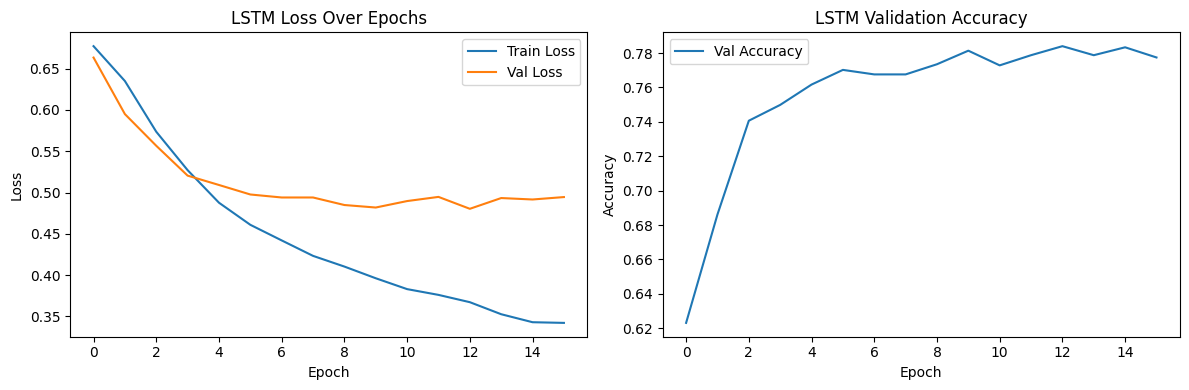

In [15]:
# Plot LSTM results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(lstm_train_losses, label='Train Loss')
plt.plot(lstm_val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('LSTM Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

lstm_model.eval()
all_probs = []
all_true = []
with torch.no_grad():
    for input_ids, labels in test_loader:
        input_ids = input_ids.to(device)
        preds = lstm_model(input_ids)
        probs = torch.sigmoid(preds)
        all_probs.extend(probs.cpu().numpy())
        all_true.extend(labels.numpy())

threshold = 0.5
y_pred = np.array(all_probs) >= threshold
y_true = np.array(all_true)

print("Accuracy  is  :", round(accuracy_score(y_true, y_pred), 4))
print("Recall    is  :", round(recall_score(y_true, y_pred), 4))
print("Precision is  :", round(precision_score(y_true, y_pred), 4))


Accuracy  is  : 0.7774
Recall    is  : 0.6857
Precision is  : 0.7672


### GRU

In [17]:
class GRU(nn.Module):
    def __init__(self, vocab_size, embed_dim=32, hidden_dim=32):
        super(GRU, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.dropout = nn.Dropout(0.2)
        self.gru = nn.GRU(embed_dim, hidden_dim, num_layers=2, batch_first=True, dropout=0.4)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x, _ = self.gru(x)
        x = torch.mean(x, dim=1)
        x = self.fc(x)
        return x.squeeze()

In [18]:
gru_model = GRU(vocab_size).to(device)
optimizer = torch.optim.Adam(gru_model.parameters(), lr=0.001)

gru_train_losses, gru_val_losses, gru_val_accuracies = train_model(
    gru_model, train_loader, test_loader, criterion, optimizer, device,
    epochs=30, patience=6
)


100%|██████████| 191/191 [00:00<00:00, 599.55it/s]


Epoch 1: Val Loss: 0.6410, Val Acc: 62.71%


100%|██████████| 191/191 [00:00<00:00, 676.11it/s]


Epoch 2: Val Loss: 0.5774, Val Acc: 71.31%


100%|██████████| 191/191 [00:00<00:00, 649.96it/s]


Epoch 3: Val Loss: 0.5398, Val Acc: 74.33%


100%|██████████| 191/191 [00:00<00:00, 723.68it/s]


Epoch 4: Val Loss: 0.5141, Val Acc: 76.03%


100%|██████████| 191/191 [00:00<00:00, 681.62it/s]


Epoch 5: Val Loss: 0.4975, Val Acc: 77.81%


100%|██████████| 191/191 [00:00<00:00, 683.70it/s]


Epoch 6: Val Loss: 0.4851, Val Acc: 78.59%


100%|██████████| 191/191 [00:00<00:00, 712.74it/s]


Epoch 7: Val Loss: 0.4783, Val Acc: 78.92%


100%|██████████| 191/191 [00:00<00:00, 681.78it/s]


Epoch 8: Val Loss: 0.4794, Val Acc: 79.05%


100%|██████████| 191/191 [00:00<00:00, 683.26it/s]


Epoch 9: Val Loss: 0.4780, Val Acc: 78.99%


100%|██████████| 191/191 [00:00<00:00, 671.35it/s]


Epoch 10: Val Loss: 0.4760, Val Acc: 78.86%


100%|██████████| 191/191 [00:00<00:00, 714.79it/s]


Epoch 11: Val Loss: 0.4713, Val Acc: 79.05%


100%|██████████| 191/191 [00:00<00:00, 686.85it/s]


Epoch 12: Val Loss: 0.4802, Val Acc: 78.40%


100%|██████████| 191/191 [00:00<00:00, 678.20it/s]


Epoch 13: Val Loss: 0.4847, Val Acc: 78.27%


100%|██████████| 191/191 [00:00<00:00, 685.74it/s]


Epoch 14: Val Loss: 0.4802, Val Acc: 78.33%


100%|██████████| 191/191 [00:00<00:00, 711.40it/s]


Epoch 15: Val Loss: 0.4937, Val Acc: 78.73%


100%|██████████| 191/191 [00:00<00:00, 715.66it/s]


Epoch 16: Val Loss: 0.5146, Val Acc: 78.07%


100%|██████████| 191/191 [00:00<00:00, 676.73it/s]


Epoch 17: Val Loss: 0.5091, Val Acc: 78.27%
Early stopping triggered!


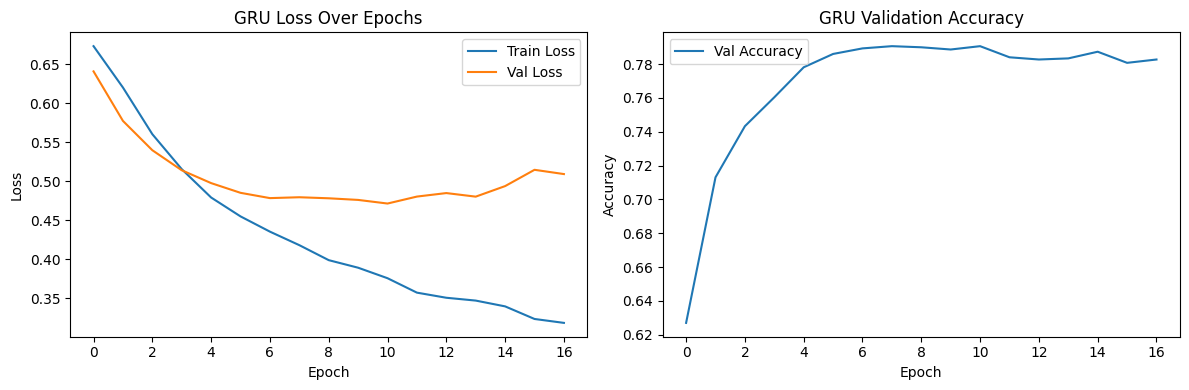

In [19]:
# Plot LSTM results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(gru_train_losses, label='Train Loss')
plt.plot(gru_val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GRU Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(gru_val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('GRU Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

gru_model.eval()
all_probs = []
all_true = []
with torch.no_grad():
    for input_ids, labels in test_loader:
        input_ids = input_ids.to(device)
        preds = gru_model(input_ids)
        probs = torch.sigmoid(preds)
        all_probs.extend(probs.cpu().numpy())
        all_true.extend(labels.numpy())

threshold = 0.5
y_pred = np.array(all_probs) >= threshold
y_true = np.array(all_true)

print("Accuracy  is  :", round(accuracy_score(y_true, y_pred), 4))
print("Recall    is  :", round(recall_score(y_true, y_pred), 4))
print("Precision is  :", round(precision_score(y_true, y_pred), 4))


Accuracy  is  : 0.7827
Recall    is  : 0.6533
Precision is  : 0.8


## Testing Data

In [ ]:
import pandas as pd
import torch
from tensorflow.keras.preprocessing.sequence import pad_sequences

test_df = pd.read_csv("test.csv")
test_df['clean_text'] = test_df['text'].apply(clean_tweet).apply(toremove_stopword)

# Tokenize + Padding
test_seq = tokenizer.texts_to_sequences(test_df['clean_text'].values)
test_pad = pad_sequences(test_seq, maxlen=MAX_LEN)

# Dataset
class SimpleTestDataset(torch.utils.data.Dataset):
    def __init__(self, X):
        self.X = torch.tensor(X, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx]

test_dataset = SimpleTestDataset(test_pad)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

def predict(model, dataloader):
    model.eval()
    all_preds = []
    with torch.no_grad():
        for input_ids in dataloader:
            input_ids = input_ids.to(device)
            output = model(input_ids)
            probs = torch.sigmoid(output)
            preds = (probs >= 0.5).long().cpu().numpy()
            all_preds.extend(preds)
    return all_preds

# predict
lstm_preds = predict(lstm_model, test_loader)
gru_preds = predict(gru_model, test_loader)

results = pd.DataFrame({
    "ID": test_df["id"],
    "LSTM": lstm_preds,
    "GRU": gru_preds
})

from IPython.display import display
display(results)

results.to_csv("submission.csv", index=False)
#

,ID,LSTM,GRU
0,0,1,1
1,2,0,1
2,3,1,1
3,9,0,0
4,11,1,1
...,...,...,...
3258,10861,1,1
3259,10865,1,1
3260,10868,1,1
3261,10874,1,1


In [ ]:
import pandas as pd

# read submission.csv
df = pd.read_csv("submission.csv")

# GRU
gru_df = df[["ID", "GRU"]].rename(columns={"ID": "id", "GRU": "target"})
gru_df.to_csv("gru_submission.csv", index=False)

# LSTM
lstm_df = df[["ID", "LSTM"]].rename(columns={"ID": "id", "LSTM": "target"})
lstm_df.to_csv("lstm_submission.csv", index=False)

print("Generate gru_submission.csv & lstm_submission.csv !")


Generate gru_submission.csv & lstm_submission.csv !


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

answer_df = pd.read_csv("test_ans.csv")

lstm_df = pd.read_csv("lstm_submission.csv")
lstm_acc = accuracy_score(answer_df["target"], lstm_df["target"])
print(f"LSTM Accuracy: {lstm_acc:.4f}")

gru_df = pd.read_csv("gru_submission.csv")
gru_acc = accuracy_score(answer_df["target"], gru_df["target"])
print(f"GRU Accuracy: {gru_acc:.4f}")



LSTM Accuracy: 0.6350
GRU Accuracy: 0.6693
